DATA MINING ASSIGNMENT - PART 2 
CREDIT DEFAULT PREDICTION 
(I worked and submitted this alone)

In this notebook, I will analyse credit risk data to predict credit card default payments using a dataset with 23 input varials. I will focus on 3 algorithms/ 3 core models which includ:
- (K-NN) k-Nearest Neigbours 
- Random Forest 
- Bagging 

For each model, the focus approach ensure in-depth tuning, evaluation and analysis. We also comput optimal probablity threshold for classification to help enhance the model performance (a bonus task).

Step 1: Importing and Data Loading 

In [ ]:
# Importing Essential Libraries 
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

## Load Datasets 
creditdefault_testdata = pd.read_csv("creditdefault_test.csv")
creditdefault_traindata = pd.read_csv("creditdefault_train.csv")

## Data Checking Preview 
print("Training Data:")
print(creditdefault_traindata.head())
print(creditdefault_traindata.info())

print("\nTest Data:")
print(creditdefault_testdata.head())
print(creditdefault_testdata.info())

## Preparing and Scaling the Data 
X_train = creditdefault_traindata.drop('Y', axis=1)
y_train = creditdefault_traindata['Y']
X_test = creditdefault_testdata.drop('Y', axis=1)
y_test = creditdefault_testdata['Y']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def eval_model(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix (Rows: Actual, Columns: Predicted):")
    print(confusion_matrix(y_true, y_pred))



Training Data:
   Y      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...     X14     X15     X16  \
0  1   20000   2   2   1  24   2   2  -1  -1  ...     689       0       0   
1  0   50000   2   2   1  37   0   0   0   0  ...   49291   28314   28959   
2  0   50000   1   2   1  57  -1   0  -1   0  ...   35835   20940   19146   
3  0   50000   1   1   2  37   0   0   0   0  ...   57608   19394   19619   
4  0  500000   1   1   2  29   0   0   0   0  ...  445007  542653  483003   

      X17    X18    X19    X20    X21    X22    X23  
0       0      0    689      0      0      0      0  
1   29547   2000   2019   1200   1100   1069   1000  
2   19131   2000  36681  10000   9000    689    679  
3   20024   2500   1815    657   1000   1000    800  
4  473944  55000  40000  38000  20239  13750  13770  

[5 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  --

Model 1: k-Nearest Algorithm (k-nn)

This is done by tuning the number of neighbours (k) using cross-validation and evaluating its performance 

K-NEAREST NEIGHBORS ANALYSIS


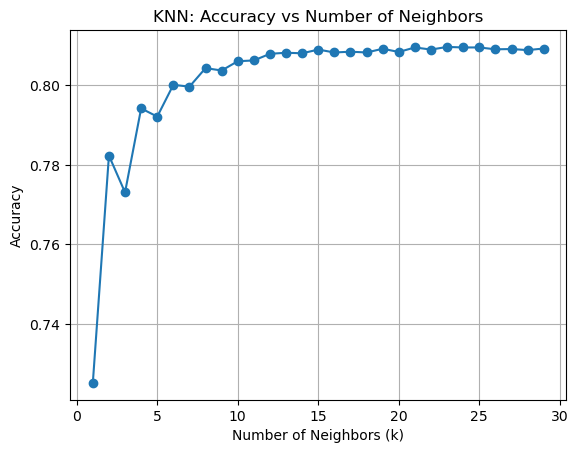

Optimal number of neighbors: 23
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     11682
           1       0.66      0.31      0.42      3318

    accuracy                           0.81     15000
   macro avg       0.74      0.63      0.65     15000
weighted avg       0.79      0.81      0.78     15000

Accuracy:  0.8115333333333333
Precision:  0.6578778135048231
Recall:  0.30831826401446655
F1-Score:  0.4198645598194131


In [29]:
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("K-NEAREST NEIGHBORS ANALYSIS")

# Hyperparameter Tuning for KNN
neighbors = range(1, 30)
knn_accuracies = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    acc = cross_val_score(knn, X_train_scaled, y_train,scoring='accuracy', cv=5, ).mean()
    knn_accuracies.append(acc)

# Visulisation: Plot accuracy vs number of neighbors
plt.plot(neighbors, knn_accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy vs Number of Neighbors")
plt.grid()
plt.show()

# Select the best number of neighbors
optimal_k = neighbors[knn_accuracies.index(max(knn_accuracies))]
print(f"Optimal number of neighbors: {optimal_k}")

# Train + Evaluate the model with the optimal k
best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn.fit(X_train_scaled, y_train)
y_pred_knn = best_knn.predict(X_test_scaled)

# Classification Metrics 
print(classification_report(y_test, y_pred_knn))
# Additional Metrics 
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

# Display Metrics 
print("Accuracy: ", knn_accuracy)
print("Precision: ", knn_precision)
print("Recall: ", knn_recall)
print("F1-Score: ", knn_f1)


Model 2 - Random Forest 

Done by tuning the max_features hyperparameters using GridSearchCV and evaluating the models performance.

RANDOM FOREST
Accuracy on the 5 folds (no tuning): [0.8        0.812      0.813      0.832      0.81566667]
Mean accuracy (no tuning): 0.8145333333333333
Accuracy on the 5 folds with tuned hyperparameters: [0.799      0.814      0.81433333 0.83       0.81933333]
Mean accuracy with tuned hyperparameters: 0.8153333333333335
Best parameter values: {'max_features': 6}
Best estimator: RandomForestClassifier(max_features=6, n_estimators=200)
Confusion matrix:
 [[10987   695]
 [ 2075  1243]]

Accuracy: 0.8153333333333334

Precision: 0.6413828689370485

Recall: 0.3746232670283303

F1 Score: 0.4729832572298326


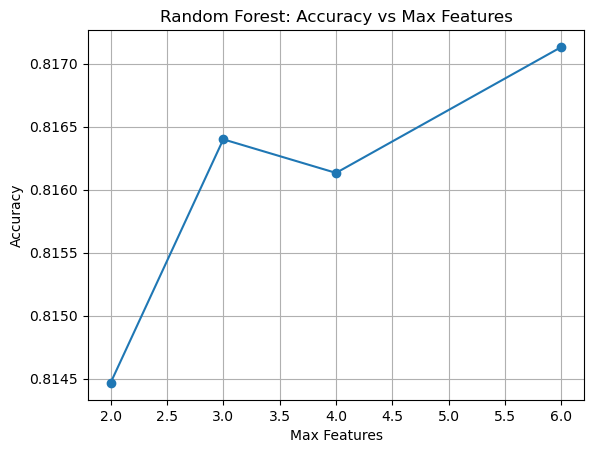

Mean score: 0.8158666666666667 for parameters: {'max_features': 2}
Mean score: 0.8158666666666667 for parameters: {'max_features': 3}
Mean score: 0.8158666666666667 for parameters: {'max_features': 4}
Mean score: 0.8183333333333334 for parameters: {'max_features': 6}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("RANDOM FOREST")

# Initialise RandomForestClassifier
rf = RandomForestClassifier()

# Cross-validation without hyperparameter tuning
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=5)
print('Accuracy on the 5 folds (no tuning):', scores)
print('Mean accuracy (no tuning):', np.mean(scores))

# Set hyperparameters manually (max_features=2, n_estimators=200)
rf.max_features = 2
rf.n_estimators = 200

# Cross-validation with manually set hyperparameters
scores = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=5)
print('Accuracy on the 5 folds with tuned hyperparameters:', scores)
print('Mean accuracy with tuned hyperparameters:', np.mean(scores))

# Grid search for hyperparameter tuning (max_features)
param_grid = [{'max_features': [2, 3, 4, 6]}]
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameter values and estimator
print('Best parameter values:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)

# Evaluate the best model from GridSearchCV on the test set
best_rf = grid_search.best_estimator_
pred_Y = best_rf.predict(X_test_scaled)

# Confusion matrix and evaluation metrics
cm = confusion_matrix(y_test, pred_Y)
print('Confusion matrix:\n', cm)
print('\nAccuracy:', accuracy_score(y_test, pred_Y))
print('\nPrecision:', precision_score(y_test, pred_Y))
print('\nRecall:', recall_score(y_test, pred_Y))
print('\nF1 Score:', f1_score(y_test, pred_Y))

# Plot accuracy vs. max_features to see how performance changes with this hyperparameter
max_features_range = [2, 3, 4, 6]
accuracies = []

# Calculate cross-validation accuracy for each value of max_features
for max_feat in max_features_range:
    rf.max_features = max_feat
    score = cross_val_score(rf, X_train_scaled, y_train, scoring='accuracy', cv=5).mean()
    accuracies.append(score)

# Plot the accuracy vs. max_features
plt.plot(max_features_range, accuracies, marker='o')
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.title("Random Forest: Accuracy vs Max Features")
plt.grid()
plt.show()

# Display performances for each fold 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f'Mean score: {mean_score} for parameters: {params}')



Model 3: Bagging 

Done by tuning the 'n_estimators' hyperparameters and evaluating the models performance. 

BAGGING
Best n_estimator: 100


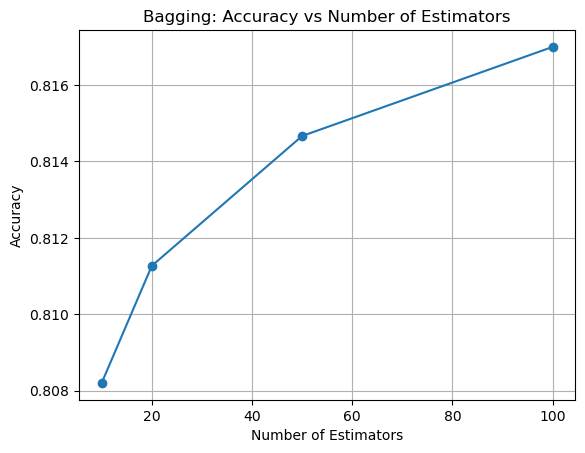

Accuracy: 0.8147
Precision: 0.6379
Recall: 0.3758
F1 Score: 0.4730

Confusion Matrix (Rows: Actual, Columns: Predicted):
[[10974   708]
 [ 2071  1247]]


In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

print("BAGGING")

# Initialise and tune Bagging
base_learner = DecisionTreeClassifier(max_depth=None, random_state=42)
bagging = BaggingClassifier(estimator=base_learner, random_state=42)
param_grid = {"n_estimators": [10, 20, 50, 100]}
grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_bagging = grid_search.best_estimator_

print(f"Best n_estimator: {grid_search.best_params_['n_estimators']}")

# Visualisation 
n_estimators_range = [10, 20, 50, 100]
bagging_accuracies = []

for n in n_estimators_range:
    bagging_temp = BaggingClassifier(estimator=base_learner, n_estimators=n, random_state=42)
    score = cross_val_score(bagging_temp, X_train_scaled, y_train, scoring='accuracy', cv=5).mean()
    bagging_accuracies.append(score)

plt.plot(n_estimators_range, bagging_accuracies, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Bagging: Accuracy vs Number of Estimators")
plt.grid()
plt.show()

# Evaluate on the test set
y_pred_bagging = best_bagging.predict(X_test_scaled)
eval_model(y_test, y_pred_bagging)


FINAL EVALUATION / MODEL COMPARISON 

Summary and comparison of the performance of all three models in order to identify which has the best F1-score. Since the data is imbalanced with few defaults, we focus on F1 Score to evaluate the models. F1 helps to balance precision, which measures how many predicted defaults were correct, and recall, which measures how many actual defaults were identified; This helps ensure the model doesn’t just predict the majority class but also catches the defaults.


In [60]:
import pandas as pd
print ("MODEL COMPARISON")

# Collecting the performance metrics
models = ['k-NN', 'Random Forest', 'Bagging']
accuracy = [knn_accuracy, accuracy_score(y_test, pred_Y), accuracy_score(y_test, y_pred_bagging)]
precision = [knn_precision, precision_score(y_test, pred_Y), precision_score(y_test, y_pred_bagging)]
recall = [knn_recall, recall_score(y_test, pred_Y), recall_score(y_test, y_pred_bagging)]
f1 = [knn_f1, f1_score(y_test, pred_Y), f1_score(y_test, y_pred_bagging)]

# COMPARISON DATAFRAME
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

print("Model Comparison:")
print(comparison_df.sort_values(by='F1 Score', ascending=False))

MODEL COMPARISON
Model Comparison:
           Model  Accuracy  Precision    Recall  F1 Score
1  Random Forest  0.815333   0.641383  0.374623  0.472983
2        Bagging  0.814733   0.637852  0.375829  0.472976
0           k-NN  0.811533   0.657878  0.308318  0.419865


Bonus : Optimal Threshold 

Calculating the Optimal Threshold for RF. 

Classifiers normally use a threshold of 0.5 to decide between classes. But with imbalanced data, changing the threshold can help improve how well the model finds defaults. Here, I adjust the threshold for RF to get the best F1 Score by balancing precision and recall.

In [37]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the positive class
y_probs = best_rf.predict_proba(X_test_scaled)[:, 1]

# Calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall )

# Find the best threshold
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]
print(f"Best threshold for classification: {best_threshold:.4f}")
print(f"F1 Score at this threshold: {f1_scores[best_threshold_index]:.4f}")

Best threshold for classification: 0.3500
F1 Score at this threshold: 0.5270


Conclusion 

After evaluating all three models for this assignmenet, It has emerged that RF is the best performing model based on the F1 Score. Although all models had similar accuracy of 81%, RF provided the best balance of precision (64.1%) and recall (37.5%) at the default threshold. In order to further enhance the models performance, I computed the optimal threshold for RF which boosted the F1 Score from 0.473 to 0.527. The improvement makes the model more reliable for identifying credit defaults. In conclusion, RF with the threshold tuning is the recommended model as its the most effective incomparison to the others when prediction credit card default. 